In [4]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_style("dark")

In [2]:
users = pd.read_csv('./ml1m/content/dataset/users.dat', sep='::',
                        engine='python',
                        names=['userid', 'gender', 'age', 'occupation', 'zip']).set_index('userid')
ratings = pd.read_csv('./ml1m/content/dataset/ratings.dat', engine='python',
                          sep='::', names=['userid', 'movieid', 'rating', 'timestamp'])
movies_train = pd.read_csv('./ml1m/content/dataset/movies_train.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid')
movies_test = pd.read_csv('./ml1m/content/dataset/movies_test.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False).set_index('movieid') 
movies_train['genre'] = movies_train.genre.str.split('|')
movies_test['genre'] = movies_test.genre.str.split('|')

In [3]:
users.age = users.age.astype('category')
users.gender = users.gender.astype('category')
users.occupation = users.occupation.astype('category')
ratings.movieid = ratings.movieid.astype('category')
ratings.userid = ratings.userid.astype('category')

In [21]:
stats = {}
stats['original_train_count'] = len(movies_train)
stats['original_test_count'] = len(movies_test)

In [7]:
def genre_count(data):
    train_genres_raw = data.genre.to_numpy().tolist()
    train_genres = [x for xs in train_genres_raw for x in xs]
    genres_count = pd.Series(train_genres).value_counts(sort=False).rename_axis('Genre').reset_index(name='Count')
    return genres_count.sort_values(by=['Genre'])

In [8]:
def plot_genre_count(genres_count, title=None, hue=None):
    plt.figure(figsize=(8,4))
    ax = sns.barplot(data=genres_count, x='Genre', y='Count', hue=hue)
    ax.tick_params(axis='x', labelrotation=45)
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)
    ax.margins(y=0.1)
    if title is not None:
        plt.title(title)
        plt.savefig(f"{title.replace(' ', '_').lower()}.pdf", bbox_inches="tight")

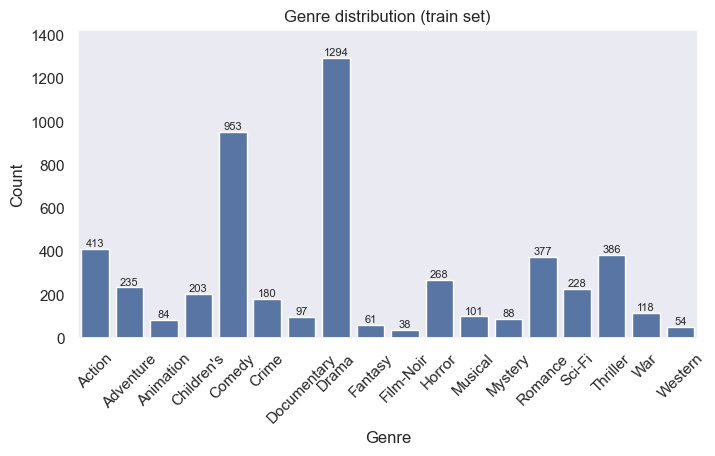

In [9]:
train_genres_count = genre_count(movies_train)
plot_genre_count(train_genres_count, "Genre distribution (train set)")

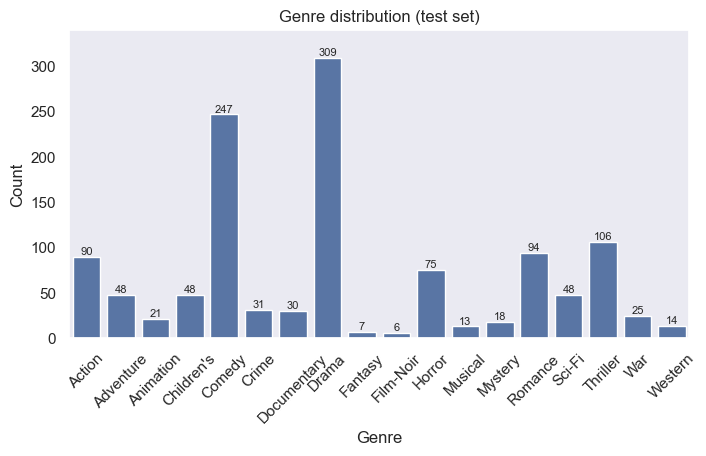

In [10]:
test_genres_count = genre_count(movies_test)
plot_genre_count(test_genres_count, "Genre distribution (test set)")

[Text(0, 0, '1610'),
 Text(0, 0, '1036'),
 Text(0, 0, '357'),
 Text(0, 0, '91'),
 Text(0, 0, '11'),
 Text(0, 0, '1')]

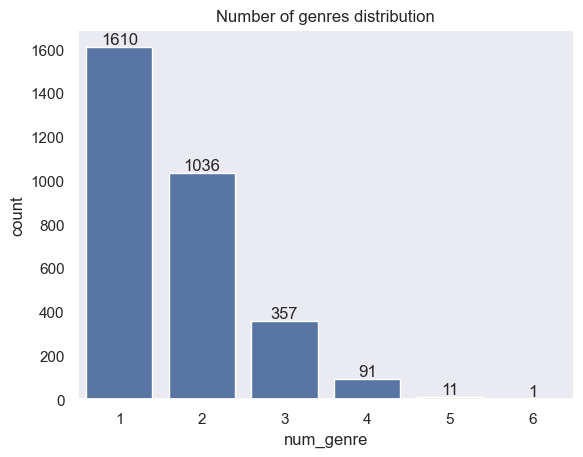

In [22]:
movies_train["num_genre"] = movies_train.genre.map(lambda x: len(x))
ax = sns.countplot(movies_train, x="num_genre")
plt.title("Number of genres distribution")
ax.bar_label(ax.containers[0])

In [27]:
train_genres_count['Dataset'] = 'Train'
test_genres_count['Dataset'] = 'Test'
all_genre_count = pd.concat([train_genres_count, test_genres_count])

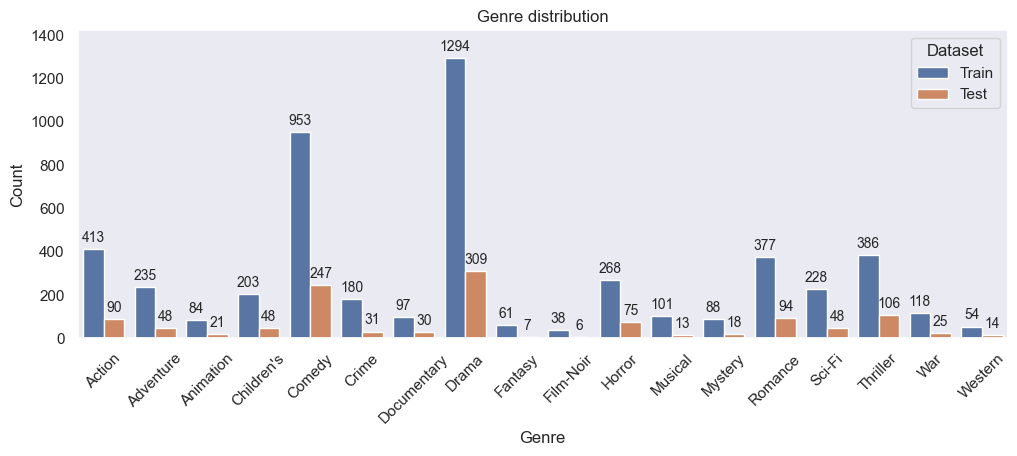

In [29]:
plt.figure(figsize=(12,4))
ax = sns.barplot(data=all_genre_count, x='Genre', y='Count', hue="Dataset")
ax.tick_params(axis='x', labelrotation = 45)
for container in ax.containers:
    ax.bar_label(container, fontsize=10,padding=3)
ax.margins(y=0.1)
plt.title("Genre distribution")
plt.savefig(f"{'Genre distribution'.replace(' ', '_').lower()}.pdf", bbox_inches="tight")

In [32]:
stats

{'original_train_count': 3106, 'original_test_count': 777}